In [1]:
import os
import csv
import json
from collections import Counter

data=[]
directory="data_tagging_j8"
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        with open(directory+"/"+filename, encoding="utf-8") as csv_file:            
            csv_reader = csv.DictReader(csv_file)
            for row in csv_reader:
                data.append(row)
    else:
        pass

nok_user=[]
user=[]
url_list=set()
for d in data:
    if d["STATUS"] == "NOK":
        nok_user.append(d["USER_ID"])
    else:
        user.append(d["USER_ID"])
    url_list.add(d["VIDEO_URL"])  
print(len(url_list))
print()
nc=Counter(nok_user)
oc=Counter(user)
print(nc)
print()
print(oc)
print()
print("reject rate: "+str(len(nok_user)/len(user)))
remove=[n for n,c in nc.items() if c>=3]
print()
# print(nc)
print(",".join(remove))

490

Counter({'e46e2603': 24, '7171fd0f': 20, '1dff5063': 18, 'cd208517': 18, '9be5608e': 17, 'f3dbc745': 13, 'eac0a6ed': 12, 'efd82768': 12, '3bcad94d': 11, '4a204893': 9, '4995a7e1': 9, '4c8acb4b': 9, '45f3ac2d': 8, '4995b78b': 8, 'd2a83828': 8, '8a6a0e96': 7, '67d0dd1d': 7, '709fd5ef': 6, '7d9fa146': 6, '325ec807': 6, '7eb41f5e': 6, '3d17bb7a': 5, 'a1f28e26': 5, '543d7328': 5, '339d4c7e': 4, 'e68c2f13': 4, '04c716b0': 4, '6e0e90dc': 4, '89a14370': 4, '8545f2f8': 4, '1d8c6ea1': 4, '8e7b6176': 4, '2779e6bc': 3, '5481493a': 3, '9032b83f': 3, '1b7aa48b': 3, '2004ad68': 3, '9c7ecabb': 3, 'b46a8833': 3, '5fb336fc': 3, 'c48868e9': 2, '8179ba49': 2, '788dc2f4': 2, 'fef0d075': 2, '75ddb43b': 2, '5292ca04': 2, '396c73bd': 2, '80cab3fa': 2, 'dc3cd2f9': 2, 'a4ba7ac3': 2, '1c94bf55': 2, 'be20033a': 2, '608b0991': 1, 'f492de19': 1, '04ed56ec': 1, 'a2d87676': 1, '17ab4021': 1, 'cd6149b5': 1, '7d138b4b': 1, 'b7ac4867': 1, '2701dd77': 1, '965ff481': 1, 'e3ac9ebc': 1, 'adaac6e4': 1, 'f51bd7bb': 1, 'f

Counter({'2004ad68': 102, '3bcad94d': 96, 'e46e2603': 88, '89a14370': 85, 'c48868e9': 55, '788dc2f4': 48, '80cab3fa': 46, '2701dd77': 42, '45f3ac2d': 39, '8545f2f8': 39, '7eb41f5e': 38, 'f3dbc745': 32, '9be5608e': 32, '4995b78b': 30, '1d8c6ea1': 30, 'd2a83828': 28, 'a4ba7ac3': 27, 'a2d87676': 26, '9032b83f': 23, '4995a7e1': 21, '325ec807': 20, 'ca7dcfcd': 20, '8e7b6176': 19, 'be20033a': 18, 'cd208517': 18, '4a204893': 17, '7171fd0f': 17, '5fb336fc': 15, '396c73bd': 15, '1b7aa48b': 14, '7d9fa146': 14, '8a6a0e96': 14, '5f3f46fd': 14, 'b1027564': 14, '2779e6bc': 12, '709fd5ef': 12, '75ddb43b': 12, '1c94bf55': 12, 'c509dd97': 12, '6356e68a': 10, '1dff5063': 10, '0b087068': 10, 'ad652739': 10, '92f4adf0': 10, 'eac0a6ed': 9, '5481493a': 9, '339d4c7e': 9, '3d17bb7a': 9, 'efd82768': 9, 'e18729fe': 8, '48fa0a30': 7, 'dec59722': 7, '4efaebfc': 6, '16ea1b12': 6, '6f508133': 5, '3f7ac405': 5, 'e68c2f13': 5, '4c8acb4b': 5, '665214a8': 5, 'fef0d075': 4, '89163bcc': 4, '67d0dd1d': 4, 'a1f28e26': 3, '

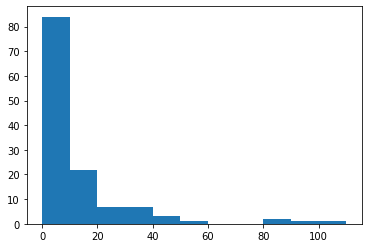

{
    "30": 7,
    "80": 2,
    "0": 84,
    "40": 3,
    "20": 7,
    "10": 22,
    "50": 1,
    "90": 1,
    "100": 1
}
e46e2603,c48868e9,3bcad94d,89a14370,2004ad68
128
11.484375
3.0
18.69691303629062


In [9]:
from collections import Counter
from matplotlib import pyplot as plt
import statistics
import numpy as np
user=[]
for d in data:
    if d["STATUS"] == "OK":
        user.append(d["USER_ID"])
c=Counter(user)
print(c)
print(np.mean(list(c.values())))
print(json.dumps({k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)},indent=4))
t=[v for t,v in c.items()]
c2=Counter([v-v%10 for v in t])
plt.bar([x+5 for x in c2.keys()],
       c2.values(),
       10)
plt.show()
print(json.dumps(c2,indent=4))
remove=[i for i,n in c.items() if n>50]
print(",".join(remove))
print(len(c))
print(statistics.mean(c.values()))
print(statistics.median(c.values()))
print(statistics.stdev(c.values()))

In [2]:
import json
from collections import defaultdict
def get_category(data):
    cate=[d["category"] for d in data]
    c=Counter(cate)
    common=c.most_common(1)
    if common[0][1]==1:
        return None
    else:
        return common[0]

data=[]
directory="data_tagging_j8"
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        with open(directory+"\\"+filename, encoding="utf-8", mode="r+") as csv_file:            
            csv_reader = csv.DictReader(csv_file)
            for row in csv_reader:
                data.append(row)
    else:
        pass

url_dict=defaultdict(list)
for d in data:
    if d["STATUS"] == "OK":
        url_dict[d["VIDEO_URL"]].append(d)
result=[]
counter=0
for url, data in url_dict.items():
    cate=get_category(data)
    if cate is None:
        counter+=1
    else:
        result.append(cate[0])
print(counter)
Counter(result)

59


Counter({'planting_trees': 30,
         'spread_word': 80,
         'live_stream_stat': 12,
         'knowledge': 47,
         'comment_news': 6,
         'theme_creation_performance': 67,
         'not_recognized': 6,
         'live_stream_game': 91,
         'theme_creation_object': 22,
         'donating': 14,
         'comment_video': 1})